In [85]:
import json
import pandas as pd
import datetime
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report


In [86]:
np.random.seed(12345)
tf.random.set_seed(12345)

In [87]:
# Import csv files from github

url = 'https://raw.githubusercontent.com/Leroy44/BTC-skew-as-a-trading-signal/main/Data/all_data.csv'


In [88]:
# Define path, datetime format, parse dates

#all_data_df = pd.read_csv(url, index_col = "date", infer_datetime_format= True, parse_dates=True)
all_data_df = pd.read_csv(Path(r"C:\Users\Ling Zhou\Desktop\Project 2\BTC-skew-as-a-trading-signal\Data\all_data.csv"), index_col = "date", infer_datetime_format= True, parse_dates=True)
all_data_df

,btc_close,btc_volume,eth_close,eth_volume,dxy_close,dxy_volume,es_close,es_volume,gc_close,gc_volume,...,eth_fiveDelta90DayExp,eth_thirtyFiveDelta180DayExp,eth_twentyFiveDelta180DayExp,eth_fifteenDelta180DayExp,eth_fiveDelta180DayExp,eth_atm7,eth_atm30,eth_atm60,eth_atm90,eth_atm180
date,,,,,,,,,,,,,,,,,,,,,
2005-09-06 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1103.25,1711.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1103.25,744.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1103.00,395.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1102.75,280.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-06 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1102.75,370.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-05 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.11,0.74,2.07,4.32,11.95,79.68,81.17,82.22,82.75,82.95
2022-01-05 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.14,0.76,2.28,4.52,11.61,81.92,82.05,82.83,83.31,83.31
2022-01-05 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.32,1.25,2.96,5.42,11.56,82.99,82.74,83.16,83.15,83.42


In [89]:
#cut the data set to timeframe where data exists for 
chopped_data_df = all_data_df.loc["2020-03-01 18:00:00":"2021-12-31 19:00:00"]
chopped_data_int_df = chopped_data_df.interpolate('linear')
chopped_data_int_df.head(5)

,btc_close,btc_volume,eth_close,eth_volume,dxy_close,dxy_volume,es_close,es_volume,gc_close,gc_volume,...,eth_fiveDelta90DayExp,eth_thirtyFiveDelta180DayExp,eth_twentyFiveDelta180DayExp,eth_fifteenDelta180DayExp,eth_fiveDelta180DayExp,eth_atm7,eth_atm30,eth_atm60,eth_atm90,eth_atm180
date,,,,,,,,,,,,,,,,,,,,,
2020-03-01 18:00:00,8456.36,1765.940,218.57,26526.352,218.57,26526.352,2843.75,101216.0,1676.8,15692.0,...,9.24,4.93,8.01,11.93,4.78,100.37,93.17,90.93,87.88,84.37
2020-03-01 19:00:00,8533.54,2949.294,219.59,8449.286,219.59,8449.286,2842.75,51816.0,1688.8,17573.0,...,9.47,4.90,7.98,11.94,4.89,100.41,92.87,90.99,87.86,84.18
2020-03-01 20:00:00,8484.55,1803.343,214.24,6292.348,214.24,6292.348,2870.75,76963.0,1687.4,35446.0,...,9.32,4.76,7.69,11.78,4.79,100.03,92.81,90.97,87.97,84.34
2020-03-01 21:00:00,8513.73,2083.146,222.07,9881.078,222.07,9881.078,2899.75,54147.0,1687.1,15904.0,...,8.56,4.11,6.60,11.13,4.39,98.04,92.53,90.69,88.20,84.46
2020-03-01 22:00:00,8565.00,1383.603,219.87,11060.615,219.87,11060.615,2894.75,37502.0,1690.5,11920.0,...,9.28,4.70,7.58,12.48,4.75,98.42,93.05,91.10,88.25,84.69


In [90]:
#removing extra vol and skew parameters - this section is no longer needed with new methodology of selecting 
#chopped_data_int_df = chopped_data_int_df.drop(["btc_thirtyFiveDelta90DayExp","btc_twentyFiveDelta90DayExp","btc_fifteenDelta90DayExp","btc_fiveDelta90DayExp","btc_thirtyFiveDelta180DayExp","btc_twentyFiveDelta180DayExp","btc_fifteenDelta180DayExp","btc_fiveDelta180DayExp"], axis=1)
#chopped_data_int_df = chopped_data_int_df.drop(["eth_thirtyFiveDelta90DayExp","eth_twentyFiveDelta90DayExp","eth_fifteenDelta90DayExp","eth_fiveDelta90DayExp","eth_thirtyFiveDelta180DayExp","eth_twentyFiveDelta180DayExp","eth_fifteenDelta180DayExp","eth_fiveDelta180DayExp"], axis=1)
#chopped_data_int_df = chopped_data_int_df.drop(["btc_thirtyFiveDelta60DayExp","btc_twentyFiveDelta60DayExp","btc_fifteenDelta60DayExp","btc_fiveDelta60DayExp","eth_thirtyFiveDelta60DayExp","eth_twentyFiveDelta60DayExp","eth_fifteenDelta60DayExp","eth_fiveDelta60DayExp"], axis=1)
#chopped_data_int_df = chopped_data_int_df.drop(["btc_thirtyFiveDelta30DayExp","btc_fifteenDelta30DayExp","btc_fiveDelta30DayExp","eth_thirtyFiveDelta30DayExp","eth_fifteenDelta30DayExp","eth_fiveDelta30DayExp"], axis=1)
#chopped_data_int_df = chopped_data_int_df.drop(["btc_thirtyFiveDelta7DayExp","btc_fifteenDelta7DayExp","btc_fiveDelta7DayExp","eth_thirtyFiveDelta7DayExp","eth_fifteenDelta7DayExp","eth_fiveDelta7DayExp"], axis=1)
#chopped_data_int_df = chopped_data_int_df.drop(["btc_atm60","btc_atm90","btc_atm180","eth_atm60","eth_atm90","eth_atm180"], axis=1)
#cleaned_data_df = chopped_data_int_df.drop(["btc_close","eth_close","dxy_close","gc_close","us_close","es_close"], axis=1)


In [91]:
#adding moving averages
chopped_data_int_df["btc_50hma"] = chopped_data_int_df['btc_close'].rolling(50).mean()
chopped_data_int_df["btc_200hma"] = chopped_data_int_df['btc_close'].rolling(200).mean()
chopped_data_int_df["btc_50_200_hma_cross"] = chopped_data_int_df['btc_close'].rolling(50).mean()-chopped_data_int_df['eth_close'].rolling(200).mean()
chopped_data_int_df["eth_50hma"] = chopped_data_int_df['eth_close'].rolling(50).mean()
chopped_data_int_df["eth_200hma"] = chopped_data_int_df['eth_close'].rolling(200).mean()
chopped_data_int_df["eth_50_200_hma_cross"] = chopped_data_int_df['eth_close'].rolling(50).mean()-chopped_data_int_df['eth_close'].rolling(200).mean()
chopped_data_int_df["btc_eth_ratio"] = chopped_data_int_df['btc_close']/chopped_data_int_df['eth_close']

# Create new variable for % change between intervals

#add percent changes for
chopped_data_int_df["btc_close_pct"] = chopped_data_int_df['btc_close'].pct_change()
chopped_data_int_df["eth_close_pct"] = chopped_data_int_df['eth_close'].pct_change()
chopped_data_int_df["dxy_close_pct"] = chopped_data_int_df['dxy_close'].pct_change()
chopped_data_int_df["es_close_pct"] = chopped_data_int_df['es_close'].pct_change()
chopped_data_int_df["gc_close_pct"] = chopped_data_int_df['gc_close'].pct_change()
chopped_data_int_df["us_close_pct"] = chopped_data_int_df['us_close'].pct_change()
chopped_data_int_df["btc_eth_ratio_pct"] = chopped_data_int_df['btc_eth_ratio'].pct_change()


In [92]:
#display all possible input variables for selection
for col in chopped_data_int_df.columns:
    display(col)

'btc_close'

'btc_volume'

'eth_close'

'eth_volume'

'dxy_close'

'dxy_volume'

'es_close'

'es_volume'

'gc_close'

'gc_volume'

'us_close'

'us_volume'

'btc_thirtyFiveDelta7DayExp'

'btc_twentyFiveDelta7DayExp'

'btc_fifteenDelta7DayExp'

'btc_fiveDelta7DayExp'

'btc_thirtyFiveDelta30DayExp'

'btc_twentyFiveDelta30DayExp'

'btc_fifteenDelta30DayExp'

'btc_fiveDelta30DayExp'

'btc_thirtyFiveDelta60DayExp'

'btc_twentyFiveDelta60DayExp'

'btc_fifteenDelta60DayExp'

'btc_fiveDelta60DayExp'

'btc_thirtyFiveDelta90DayExp'

'btc_twentyFiveDelta90DayExp'

'btc_fifteenDelta90DayExp'

'btc_fiveDelta90DayExp'

'btc_thirtyFiveDelta180DayExp'

'btc_twentyFiveDelta180DayExp'

'btc_fifteenDelta180DayExp'

'btc_fiveDelta180DayExp'

'btc_atm7'

'btc_atm30'

'btc_atm60'

'btc_atm90'

'btc_atm180'

'eth_thirtyFiveDelta7DayExp'

'eth_twentyFiveDelta7DayExp'

'eth_fifteenDelta7DayExp'

'eth_fiveDelta7DayExp'

'eth_thirtyFiveDelta30DayExp'

'eth_twentyFiveDelta30DayExp'

'eth_fifteenDelta30DayExp'

'eth_fiveDelta30DayExp'

'eth_thirtyFiveDelta60DayExp'

'eth_twentyFiveDelta60DayExp'

'eth_fifteenDelta60DayExp'

'eth_fiveDelta60DayExp'

'eth_thirtyFiveDelta90DayExp'

'eth_twentyFiveDelta90DayExp'

'eth_fifteenDelta90DayExp'

'eth_fiveDelta90DayExp'

'eth_thirtyFiveDelta180DayExp'

'eth_twentyFiveDelta180DayExp'

'eth_fifteenDelta180DayExp'

'eth_fiveDelta180DayExp'

'eth_atm7'

'eth_atm30'

'eth_atm60'

'eth_atm90'

'eth_atm180'

'btc_50hma'

'btc_200hma'

'btc_50_200_hma_cross'

'eth_50hma'

'eth_200hma'

'eth_50_200_hma_cross'

'btc_eth_ratio'

'btc_close_pct'

'eth_close_pct'

'dxy_close_pct'

'es_close_pct'

'gc_close_pct'

'us_close_pct'

'btc_eth_ratio_pct'

In [93]:
#select input data for LSTM model
new_df=chopped_data_int_df[["btc_close_pct","btc_volume","eth_close_pct","eth_volume"]].copy()

In [94]:
#remove dependent variable

#X=cleaned_data_df.drop(["btc_close_pct"],axis=1)
X=new_df

#shift dependent variable back to line up forward return
z=chopped_data_int_df["btc_close_pct"].shift(-1)

In [95]:
y_list=[]
for i in range(0,len(z)):
  if z[i] < -0.005: 
    y_list.append(-2),
  elif (z[i] <-0.001 and z[i] >= -0.005):
    y_list.append(-1),
  elif (z[i] <= 0.005 and z[i] > 0.001):
    y_list.append(1),
  elif z[i] > 0.005: 
    y_list.append(2)
  else:
    y_list.append(0)

In [96]:
#converting the y list into a series with the relevant date-time index
y_df = pd.Series(y_list,index=z.index)

y = pd.get_dummies(y_df)

y.value_counts()

-2  -1  0  1  2
0   0   0  1  0    3805
    1   0  0  0    3719
    0   0  0  1    3024
        1  0  0    2788
1   0   0  0  0    2776
dtype: int64

In [97]:
display(y.head())
display(len(y))

,-2,-1,0,1,2
date,,,,,
2020-03-01 18:00:00,0,0,0,0,1
2020-03-01 19:00:00,1,0,0,0,0
2020-03-01 20:00:00,0,0,0,1,0
2020-03-01 21:00:00,0,0,0,0,1
2020-03-01 22:00:00,0,1,0,0,0


16112

In [98]:
#calculating 70% for training, 30% testing
training_end = round(len(y)*.7)
test_end = round(len(y)*1)
display(training_end)
display(test_end)

11278

16112

In [99]:
#creating training sets
X_train = X.iloc[1:training_end,]
y_train = y.iloc[1:training_end,]

#creating testing sets
X_test=X.iloc[training_end:test_end,]
y_test=y.iloc[training_end:test_end,]

In [100]:
#scale the data
scaler = StandardScaler()

#apply scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

#Transform X_train, X_test, X_validate using X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#X_validate_scaled = X_scaler.transform(X_validate)

In [101]:
#LSTM Model

model = Sequential()
model.add(LSTM(
    units=X_train.shape[1], return_sequences=True,
    input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=X_train.shape[1], return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4, 4)              96        
                                                                 
 dropout_6 (Dropout)         (None, 4, 4)              0         
                                                                 
 lstm_7 (LSTM)               (None, 4, 4)              144       
                                                                 
 dropout_7 (Dropout)         (None, 4, 4)              0         
                                                                 
 lstm_8 (LSTM)               (None, 4)                 144       
                                                                 
 dropout_8 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                

In [102]:
#train the model
model.fit(X_train_scaled, y_train, epochs=11, shuffle=False, batch_size=64, verbose=1)

Epoch 1/11
177/177 [==============================] - 3s 3ms/step - loss: 1.6085 - accuracy: 0.2217
Epoch 2/11
177/177 [==============================] - 1s 3ms/step - loss: 1.6042 - accuracy: 0.2251
Epoch 3/11
177/177 [==============================] - 1s 3ms/step - loss: 1.6006 - accuracy: 0.2429
Epoch 4/11
177/177 [==============================] - 1s 3ms/step - loss: 1.5963 - accuracy: 0.2464
Epoch 5/11
177/177 [==============================] - 1s 3ms/step - loss: 1.5898 - accuracy: 0.2529
Epoch 6/11
177/177 [==============================] - 1s 3ms/step - loss: 1.5859 - accuracy: 0.2619
Epoch 7/11
177/177 [==============================] - 1s 3ms/step - loss: 1.5822 - accuracy: 0.2579
Epoch 8/11
177/177 [==============================] - 1s 3ms/step - loss: 1.5770 - accuracy: 0.2661
Epoch 9/11
177/177 [==============================] - 1s 3ms/step - loss: 1.5748 - accuracy: 0.2656
Epoch 10/11
177/177 [==============================] - 1s 3ms/step - loss: 1.5741 - accuracy: 0.2676

In [103]:
#calculate predicted values using X_test
predicted_y_test =  model.predict(X_test_scaled)
print(predicted_y_test)

[[0.15446177 0.2457488  0.18785773 0.24247174 0.16945998]
 [0.1650809  0.20134577 0.20003074 0.24136548 0.19217706]
 [0.15011163 0.22207868 0.20627809 0.25098455 0.17054716]
 ...
 [0.20415515 0.16266148 0.17131229 0.21095844 0.2509126 ]
 [0.18076251 0.18572518 0.18923566 0.22970787 0.21456881]
 [0.28012285 0.10272621 0.1023704  0.13993426 0.37484634]]


In [104]:
X_test_scaled

array([[ 0.13311837, -0.00978853,  0.04623729, -0.03111569],
       [-0.54919622, -0.56475207, -0.13947266, -0.39644666],
       [-0.03638275, -0.69319018, -0.70763636, -0.44471998],
       ...,
       [-1.0289866 , -0.31888968, -0.58442043, -0.10755146],
       [-0.7738081 , -0.34181591, -0.42508253, -0.03479518],
       [-2.11124287,  0.17051333, -1.76011727,  0.3619059 ]])

In [105]:
predicted_y_test_df = pd.DataFrame(predicted_y_test, index=X_test.index)
predicted_y_test_df.head()

,0,1,2,3,4
date,,,,,
2021-06-14 01:00:00,0.154462,0.245749,0.187858,0.242472,0.169460
2021-06-14 02:00:00,0.165081,0.201346,0.200031,0.241365,0.192177
2021-06-14 03:00:00,0.150112,0.222079,0.206278,0.250985,0.170547
2021-06-14 04:00:00,0.203141,0.232674,0.140337,0.201647,0.222202
2021-06-14 05:00:00,0.165750,0.240500,0.177496,0.233601,0.182653


In [106]:
predicted_y_test_df.columns=["-2","-1","0","1","2"]
predicted_y_test_df.head()

,-2,-1,0,1,2
date,,,,,
2021-06-14 01:00:00,0.154462,0.245749,0.187858,0.242472,0.169460
2021-06-14 02:00:00,0.165081,0.201346,0.200031,0.241365,0.192177
2021-06-14 03:00:00,0.150112,0.222079,0.206278,0.250985,0.170547
2021-06-14 04:00:00,0.203141,0.232674,0.140337,0.201647,0.222202
2021-06-14 05:00:00,0.165750,0.240500,0.177496,0.233601,0.182653


In [107]:
m = np.zeros_like(predicted_y_test_df.values)
m[np.arange(len(predicted_y_test_df)), predicted_y_test_df.values.argmax(1)] =1 
df1 = pd.DataFrame(m, columns=predicted_y_test_df.columns,index=X_test.index).astype(int)
display(df1.head(5))
display(df1.value_counts())

,-2,-1,0,1,2
date,,,,,
2021-06-14 01:00:00,0,1,0,0,0
2021-06-14 02:00:00,0,0,0,1,0
2021-06-14 03:00:00,0,0,0,1,0
2021-06-14 04:00:00,0,1,0,0,0
2021-06-14 05:00:00,0,1,0,0,0


-2  -1  0  1  2
0   0   0  1  0    2806
           0  1    1256
    1   0  0  0     772
dtype: int64

In [108]:
y_test.value_counts()

-2  -1  0  1  2
0   0   0  1  0    1197
    1   0  0  0    1172
    0   0  0  1     860
1   0   0  0  0     851
0   0   1  0  0     754
dtype: int64

In [109]:

#create classification report
btc_testing_report = classification_report(y_test, df1)
print(btc_testing_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       851
           1       0.25      0.17      0.20      1172
           2       0.00      0.00      0.00       754
           3       0.27      0.63      0.38      1197
           4       0.23      0.34      0.27       860

   micro avg       0.26      0.26      0.26      4834
   macro avg       0.15      0.23      0.17      4834
weighted avg       0.17      0.26      0.19      4834
 samples avg       0.26      0.26      0.26      4834



C:\Users\Ling Zhou\anaconda3\envs\main\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
#convert the outsample trades the model chooses into a format of trade size + direction
df2=df1.copy()
scalar=list(df2.columns.values.astype(int))
df2=df2*scalar
df2["position"]=df2.sum(axis=1)
df2

,-2,-1,0,1,2,position
date,,,,,,
2021-06-14 01:00:00,0,-1,0,0,0,-1
2021-06-14 02:00:00,0,0,0,1,0,1
2021-06-14 03:00:00,0,0,0,1,0,1
2021-06-14 04:00:00,0,-1,0,0,0,-1
2021-06-14 05:00:00,0,-1,0,0,0,-1
...,...,...,...,...,...,...
2021-12-31 15:00:00,0,0,0,1,0,1
2021-12-31 16:00:00,0,0,0,0,2,2
2021-12-31 17:00:00,0,0,0,0,2,2


In [111]:
#over btc returns on trade size+position df
df2=df2.join(z,how="inner")
df2=df2.dropna()
df2

,-2,-1,0,1,2,position,btc_close_pct
date,,,,,,,
2021-06-14 01:00:00,0,-1,0,0,0,-1,-0.005121
2021-06-14 02:00:00,0,0,0,1,0,1,-0.000169
2021-06-14 03:00:00,0,0,0,1,0,1,0.007632
2021-06-14 04:00:00,0,-1,0,0,0,-1,0.003675
2021-06-14 05:00:00,0,-1,0,0,0,-1,0.003954
...,...,...,...,...,...,...,...
2021-12-31 14:00:00,0,0,0,1,0,1,-0.000521
2021-12-31 15:00:00,0,0,0,1,0,1,-0.010490
2021-12-31 16:00:00,0,0,0,0,2,2,-0.009755


In [112]:
#calculate P&L + transaction costs
transaction= .000045
df2["pnl"]=df2["position"]*df2["btc_close_pct"] - transaction

#lstm summary stats
annualized_return=df2["pnl"].mean()*24*365
annualized_std=df2["pnl"].std()*((24*365)**(.5))
sharpe_ratio=annualized_return/annualized_std

#BTC summary stats over our test period
btc_annualized_return=df2["btc_close_pct"].mean()*24*365
btc_annualized_std=df2["btc_close_pct"].std()*((24*365)**(.5))
btc_sharpe_ratio=btc_annualized_return/btc_annualized_std




In [113]:
#output variables used
for col in new_df.columns:
    print(col)

btc_close_pct
btc_volume
eth_close_pct
eth_volume


BTC Annualized Return: 51.696043%
BTC Annualized Standard Deviation: 66.393471%
BTC Sharpe Ratio: 0.7786314196077307
LSTM Annualized Return: 92.661921%
LSTM Annualized Standard Deviation: 97.534511%
LSTM Sharpe Ratio: 0.950042402431615


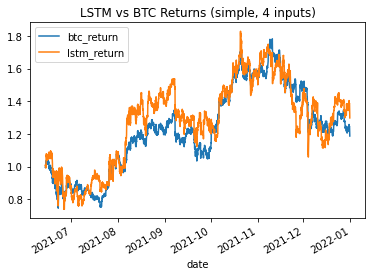

In [114]:
#output lstm return/stdev/sharpe vs holding btc long

df2["btc_return"]=df2["btc_close_pct"]
df2["lstm_return"]=df2["pnl"]
(1 + df2[["btc_return","lstm_return"]]).cumprod().plot(title="LSTM vs BTC Returns (simple, 4 inputs)")

print("BTC Annualized Return: {:%}".format(btc_annualized_return))
print("BTC Annualized Standard Deviation: {:%}".format(btc_annualized_std))
print("BTC Sharpe Ratio: {}".format(btc_sharpe_ratio))

print("LSTM Annualized Return: {:%}".format(annualized_return))
print("LSTM Annualized Standard Deviation: {:%}".format(annualized_std))
print("LSTM Sharpe Ratio: {}".format(sharpe_ratio))

In [115]:
#output frequency of each trade
df1.value_counts()

-2  -1  0  1  2
0   0   0  1  0    2806
           0  1    1256
    1   0  0  0     772
dtype: int64

In [116]:
#output model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4, 4)              96        
                                                                 
 dropout_6 (Dropout)         (None, 4, 4)              0         
                                                                 
 lstm_7 (LSTM)               (None, 4, 4)              144       
                                                                 
 dropout_7 (Dropout)         (None, 4, 4)              0         
                                                                 
 lstm_8 (LSTM)               (None, 4)                 144       
                                                                 
 dropout_8 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                

In [117]:
#output precision metrics
print(btc_testing_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       851
           1       0.25      0.17      0.20      1172
           2       0.00      0.00      0.00       754
           3       0.27      0.63      0.38      1197
           4       0.23      0.34      0.27       860

   micro avg       0.26      0.26      0.26      4834
   macro avg       0.15      0.23      0.17      4834
weighted avg       0.17      0.26      0.19      4834
 samples avg       0.26      0.26      0.26      4834

